<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Licao2_MLP_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 2 - Conjuntos não linearmente separáveis 

Nesta lição, vamos ver a aplicação das redes neurais em um problema não linearmente separável. 

Temos duas classes, com coordenadas bi-dimensionais. 

O conjunto 0 está nos quadrantes I e III. O conjunto 1 está nos quadrantes II e IV. 



## Carregando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Carregando o conjunto de dados

In [2]:
!wget https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
!tar -zxvf Licao2bis_MLP_XOR.tar.gz

--2023-04-19 00:59:55--  https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz [following]
--2023-04-19 00:59:55--  https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54041 (53K) [application/octet-stream]
Saving to: ‘Licao2bis_MLP_XOR.tar.gz’

Licao2bis_MLP_XOR.t 100%[===================>]  52.77K  --.-KB/s    in 0.007s  

2023-04-19 00:59:56 (6.98 MB/s) - ‘Licao2bis_MLP_XOR.tar.gz’ saved [54041/54041]

train_label.csv
t

## Lendo os dados em csv

In [3]:
from numpy import genfromtxt
train_data = genfromtxt('train_data.csv', delimiter=',')
train_label = genfromtxt('train_label.csv', delimiter=',')

test_data = genfromtxt('test_data.csv', delimiter=',')
test_label = genfromtxt('test_label.csv', delimiter=',')


## A dispersão dos dados (treinamento e teste)



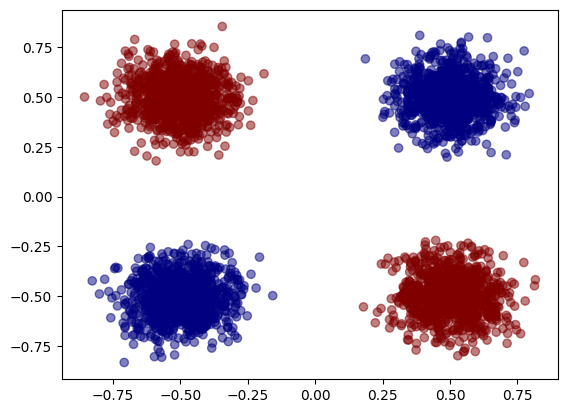

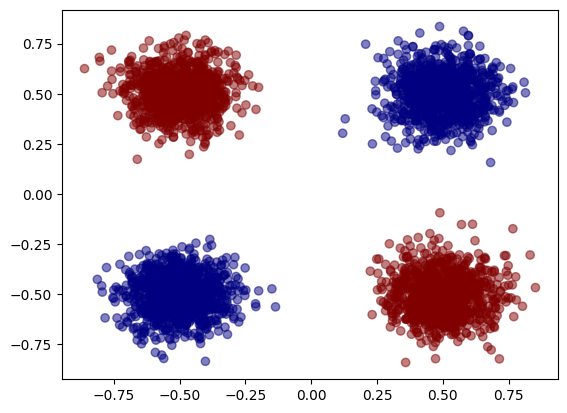

In [4]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_label , alpha=0.5, cmap='jet')
plt.show()
plt.scatter(test_data[:,0], test_data[:,1], c=test_label , alpha=0.5, cmap='jet')
plt.show()

## Primeira tentativa: Rede neural com apenas um neurônio

In [6]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(train_data, train_label, epochs=50)

model.summary()

Epoch 1/50
125/125 [==============================] - 2s 3ms/step - loss: 0.2732 - accuracy: 0.5048
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.5155
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.5312
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.5447
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.5558
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.5688
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.5835
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.5935
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.6050
Epoch 10/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.6087

## Dispersão da predição para o conjunto de teste

125/125 [==============================] - 1s 4ms/step


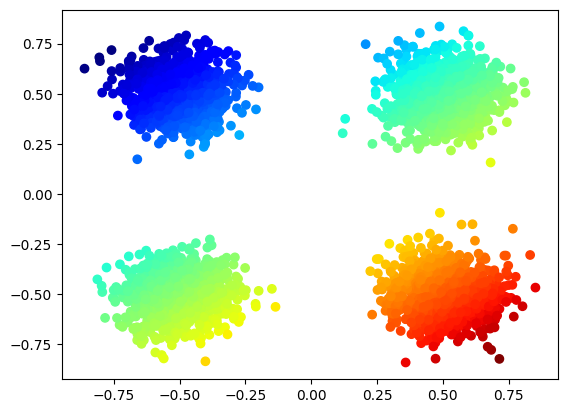

In [7]:
test_predict = model.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict , cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 [==============================] - 0s 1ms/step


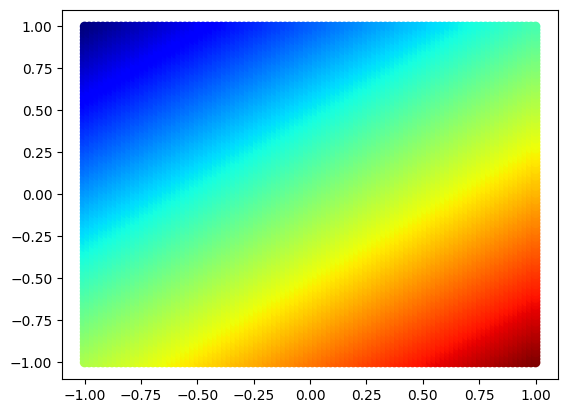

In [8]:
nx = 100
ny = 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict4 = model.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict4, cmap='jet')
plt.show()

## Adição de camada 

In [9]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[2]),                                                                     
                              tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

#model2.fit(train_data, train_label, epochs=500)


history = model2.fit(train_data, train_label,
                    batch_size=20,
                    epochs=40,
                    verbose=1,
                    validation_data=(test_data, test_label))

model2.summary()

Epoch 1/40
200/200 [==============================] - 1s 4ms/step - loss: 0.2274 - accuracy: 0.5570 - val_loss: 0.2189 - val_accuracy: 0.7283
Epoch 2/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2112 - accuracy: 0.8077 - val_loss: 0.2041 - val_accuracy: 0.8390
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9160 - val_loss: 0.1912 - val_accuracy: 0.9457
Epoch 4/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1849 - accuracy: 0.9740 - val_loss: 0.1789 - val_accuracy: 0.9833
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1729 - accuracy: 0.9927 - val_loss: 0.1672 - val_accuracy: 0.9933
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9960 - val_loss: 0.1559 - val_accuracy: 0.9983
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1503 - accuracy: 0.9990 - val_loss: 0.1451 - val_accuracy: 0.9985
Epoch 

## Evolução do treinamento

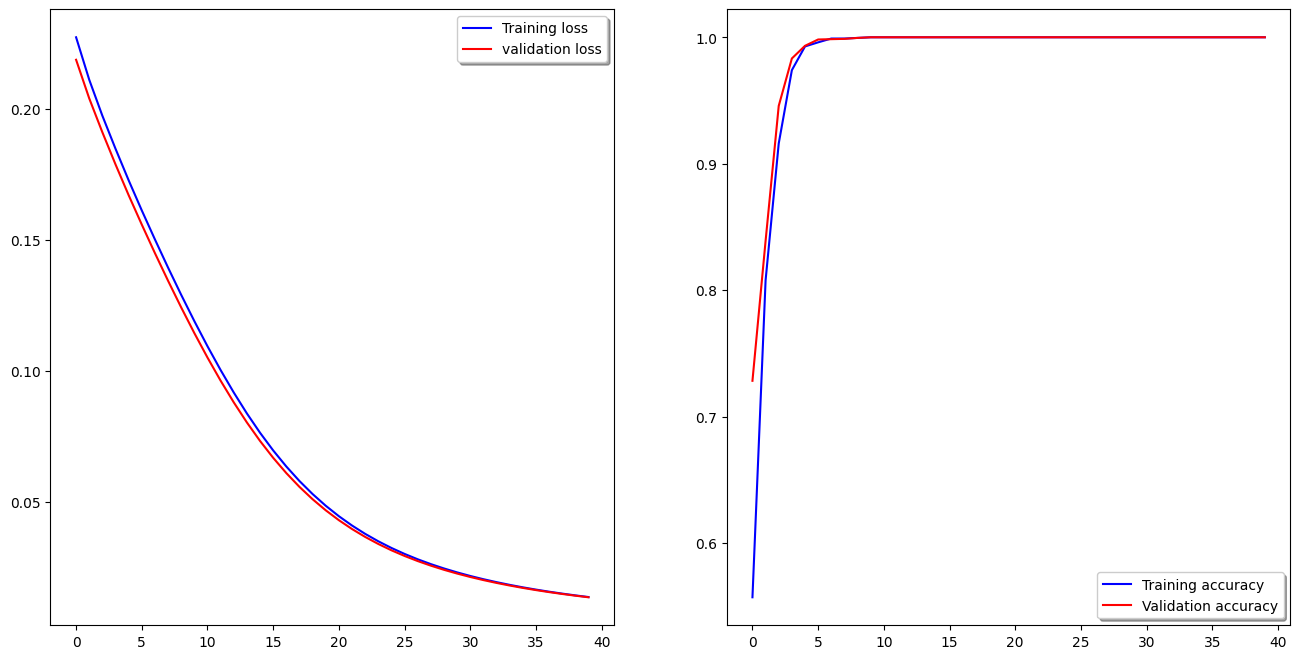

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



## Dispersão do conjunto de teste (predição)

125/125 [==============================] - 0s 1ms/step


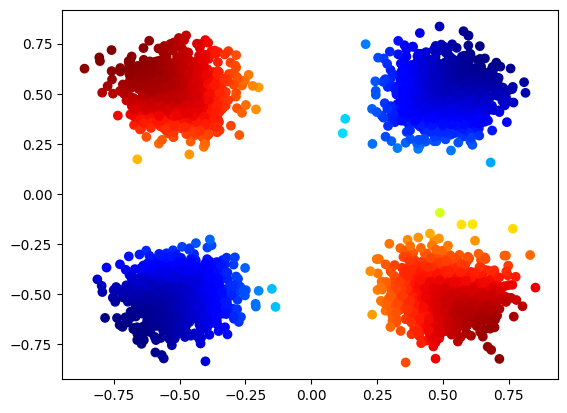

In [11]:

test_predict2 = model2.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict2, cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 [==============================] - 1s 2ms/step


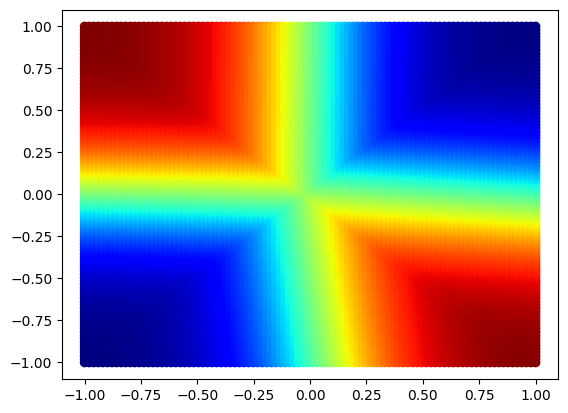

In [12]:
nx = 100
ny = 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict3 = model2.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict3, cmap='jet')
plt.show()
